# 插值法
插值法有：分段插值、Lagrange插值、Hermite插值等多种方法

## 模型解释

### 适用场景
1. 对于诸如 $y=e^{sinx}$ 等难以计算、比较复杂的函数，我们希望找到一个近似的替代函数，用以**方便计算**y的粗略值。
2. 当**数据量不足，需要补充**，且认定已有数据可信时。（建立该模型处理数据）

### 原理证明
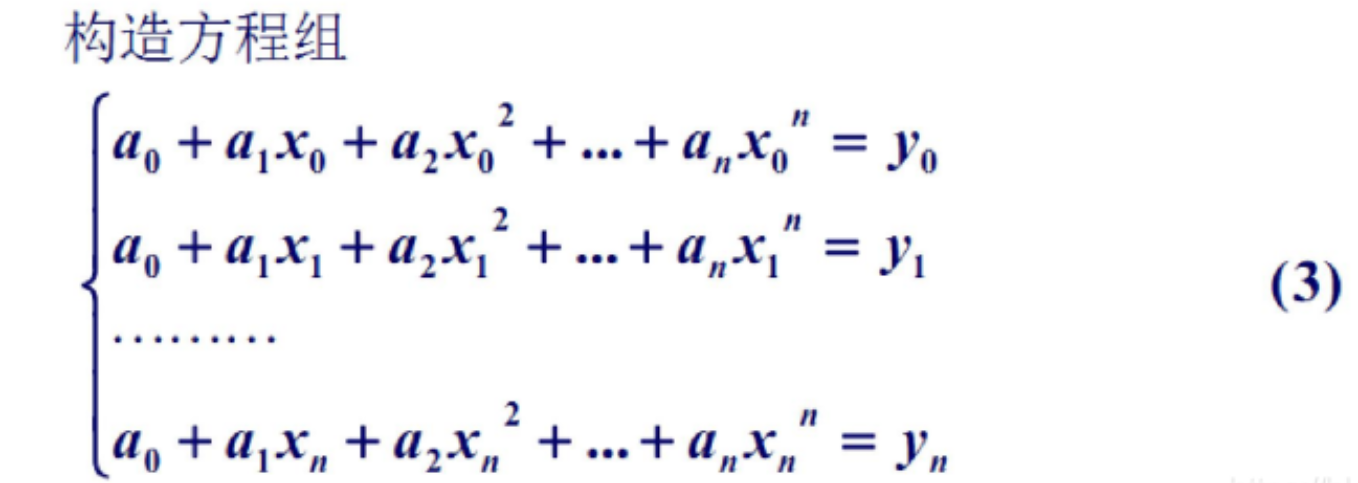
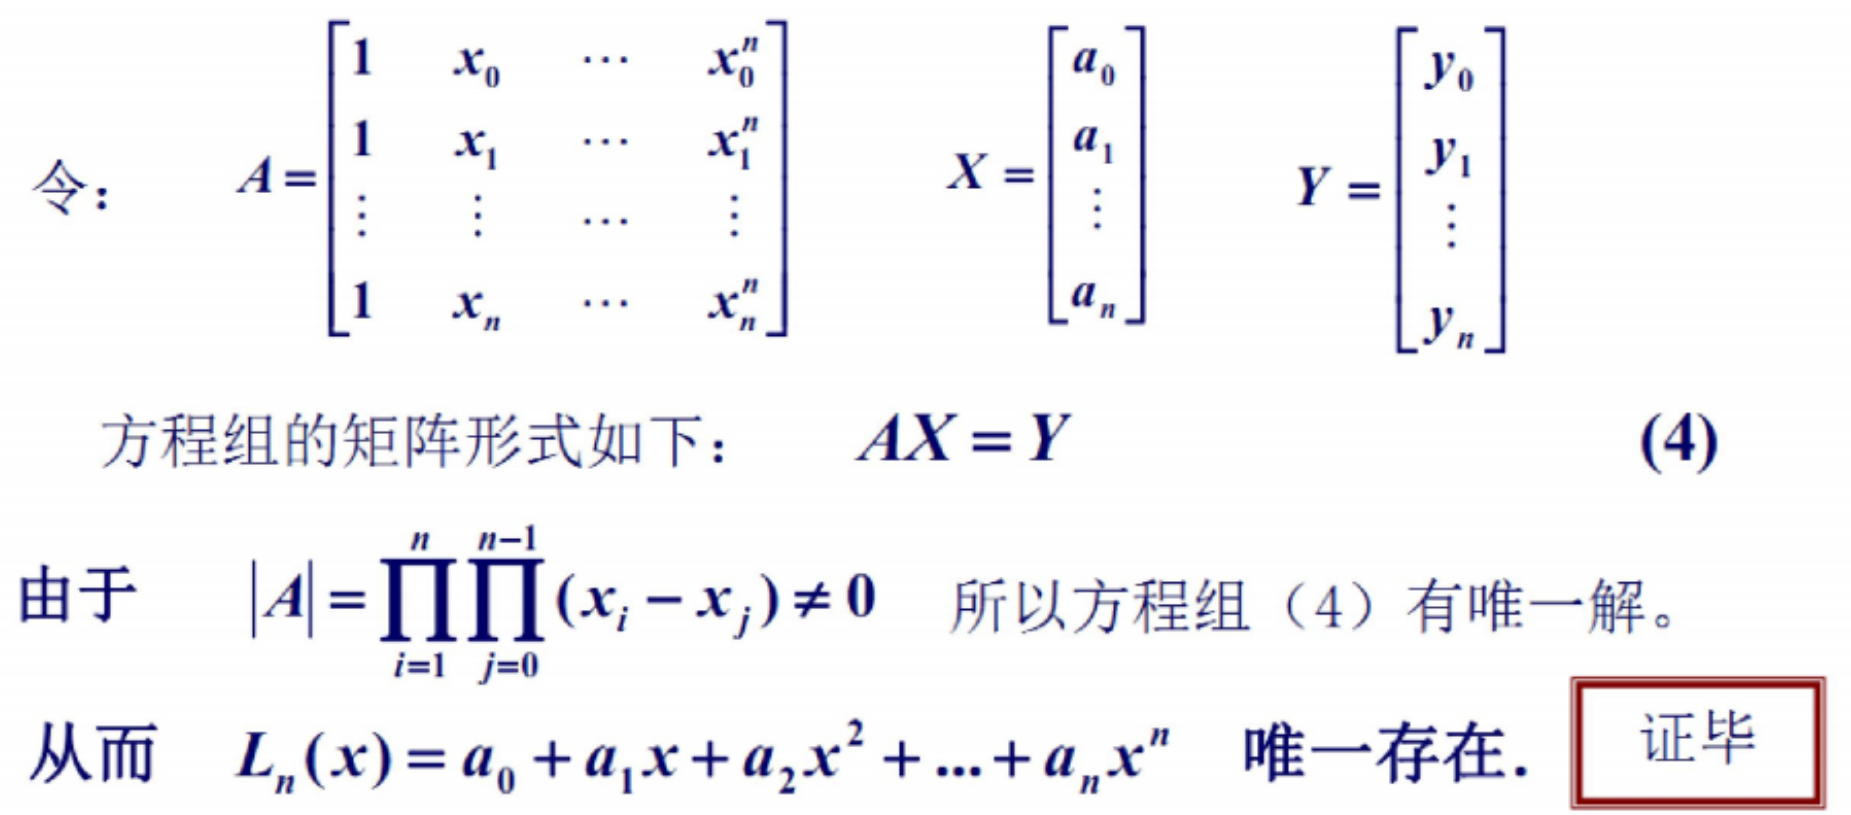
若A可逆，则A不等于0，则方程式有唯一解。

## 分段插值

### 算法过程
每几个点之间构造一个多项式，然后可以构造多个多项式，那么这样就可以产生多个多项式。这就是分段插值。

给出x，在与之相邻的两点之间构造函数，寻找分段二次插值：选取跟节点x最近的三个节点 $x_{i-1},x_{i},x_{i+1}$ ​进行二次插值，

即在每一个区间 $[x_{i-1},x_{i+1}]$上,取$f(x) \approx L_{2}(x)=\sum_{i=0}^{n}y_{i}l_{i}(x)$，其中

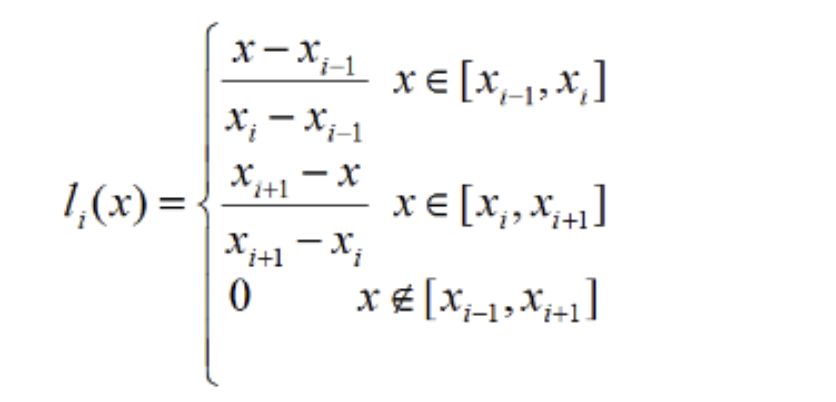

### 适用场景
需要提高插值精度的时候，能解决龙格现象（Lagarange、牛顿的高次插值在两端处波动极大，会产生明显的震荡）

但是数据光滑性和连续性不佳。

### 代码

In [ ]:
# Linear Interploation
import numpy as np
import matplotlib.pyplot as plt

def linear_interpolate(x0,x1,y0,y1,x):
    return (x-x1)/(x0-x1)*y0 + (x-x0)/(x1-x0)*y1

def segmented_linear_interpolate(xlist, ylist, x):
    # we have to make sure that items in xlist is in order
    xlist = sorted(xlist)
    data = dict(zip(xlist,ylist))
    # Sort by key, (which is xlist)
    data = sorted(data.items(),key=lambda item:item[0])
    data = dict(data)
    xlist = list(data.keys())
    ylist = list(data.values())
    n = len(xlist)-1
    if n == 0:
        raise ValueError("n should be greater or equal to 1")
    # print("segmented Linear interpolate, n =",n)
    # Judge which interval the new element should be
    i = -1
    for t in xlist:
        if x >= t:
            i += 1
    if i == -1 or i > len(xlist)-1:
        raise ValueError("x should be between %f and %f"%(xlist[0],xlist[-1]))  
    if i == len(xlist)-1:
        return ylist[i]
    return linear_interpolate(xlist[i], xlist[i+1], ylist[i], ylist[i+1], x)
 
# DATA
f = lambda x: 1/(1+25*x**2)
# x_points = [0,1,2,3,4]
# y_points = [20,18,10,2,1]
x_points = np.linspace(-1,1,11)
y_points = list(map(f,x_points))

# Segmented Linear Interpolation
f = lambda t: segmented_linear_interpolate(x_points,y_points,t)
x = np.linspace(-1,1,51)
y = list(map(f,x))                          

plt.figure("segmented linear interpolation")
plt.scatter(x_points,y_points,color = "orange")
plt.plot(x,y)
plt.legend(["segmented linear interpolation","scattered points"])
plt.show()

## Lagrange插值

### 算法过程

在若干个不同的地方得到相应的观测值，拉格朗日插值法可以找到一个多项式，其恰好在各个观测的点取到观测到的值。

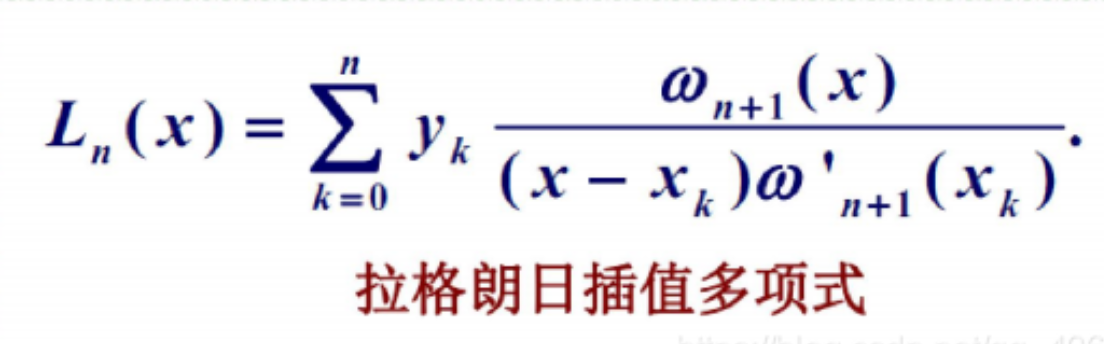

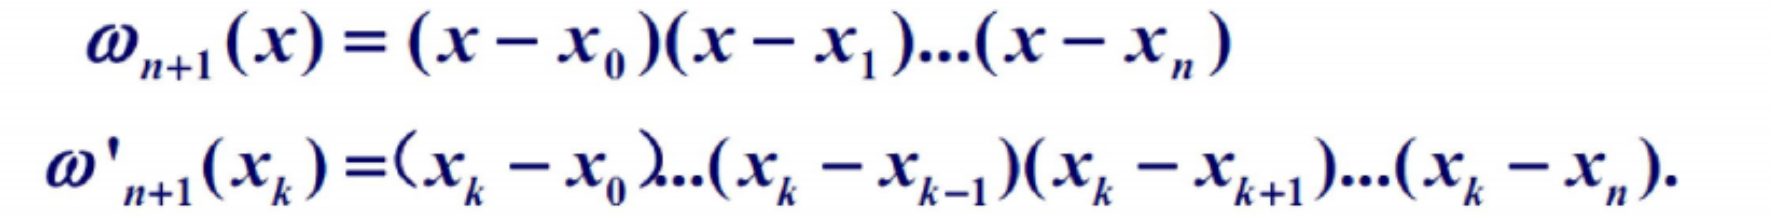

### 适用场景
带入的点不能过多，对拉格朗日插值来说，不是点越多精度越高。

点越多，拉格朗日插值多项式次数越高，在两端就容易出现震荡现象，即龙格现象

所以只用带入缺少数据周围的部分点即可

### 代码

In [ ]:
# Lagrange Interpolation
import matplotlib.pyplot as plt
import numpy as np

# Definition of general basis functions
def Lagrange_InterpolationDotN_Li(x_data, y_data, k, x):
    size = len(x_data)
    i = 0
    Ly = y_data[k]
    while( i < size):
        if(i != k):
            Ly = Ly * (x-x_data[i])/(x_data[k]-x_data[i])
        i += 1
    return (Ly)

# Definition of general Lagrange Interpolation function
def Lagrange_InterpolationDotN_F(x_data, y_data, x):
    x_data = sorted(x_data)
    data = dict(zip(x_data,y_data))
    # Sort by key, (which is x_data)
    data = sorted(data.items(),key=lambda item:item[0])
    data = dict(data)
    x_data = list(data.keys())
    y_data = list(data.values())
    size = len(x_data)
    k = 0
    sum = 0
    while(k < size):
        sum = sum + Lagrange_InterpolationDotN_Li(x_data, y_data, k, x)
        k += 1
    return (sum)

# DATA
# x_points = [1, 2, 3]
# y_points = [4, 8, 6]
x_points = [1, 2, 3, 4]
y_points = [4, 8, 6, 7]

# Lagrange Interpolation, 4 DOTs:
f = lambda t: Lagrange_InterpolationDotN_F(x_points, y_points, t)
x = np.arange(0, 5, 0.2)  # (0, 4.2, 0.2)
y = list(map(f,x))
 
plt.figure("Lagrange Interpolation Dot N")
plt.scatter(x_points,y_points,color = "orange")
plt.plot(x, y)
plt.legend(["lagrange interpolation","scattered points"])
plt.show() 

## Hermite插值

### 算法过程

不仅要求插值函数在插值节点处与被插函数有相同的函数值, 而且要求在有些节点或全部节点上，与被插函数的导数值也相等，甚至要求高阶导数值也相等。

但对整体函数直接使用Hermite插值得到的多项式次数较高，即存在着龙格现象，因此在实际应用中，往往使用**分段三次Hermite插值多项式**

Hermite插值公式：

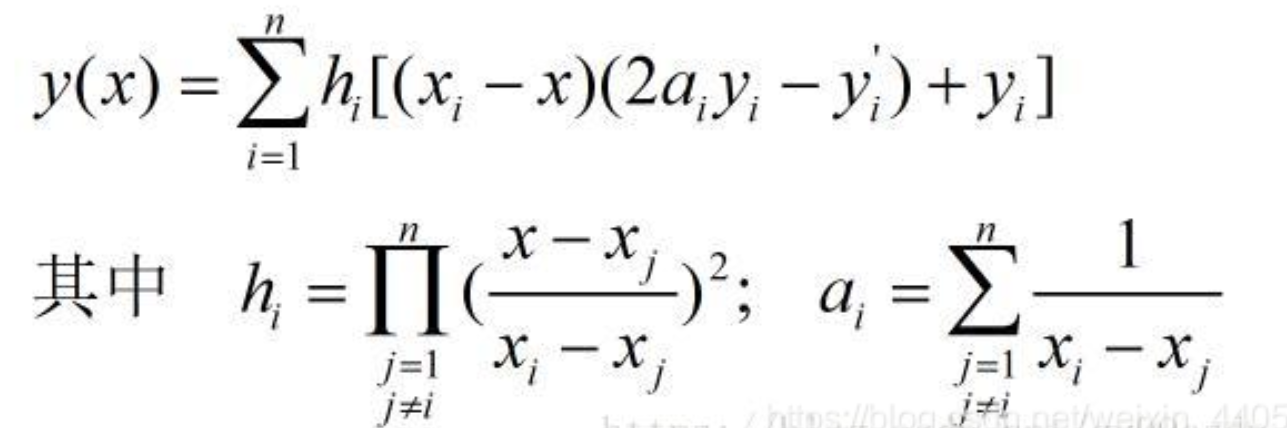

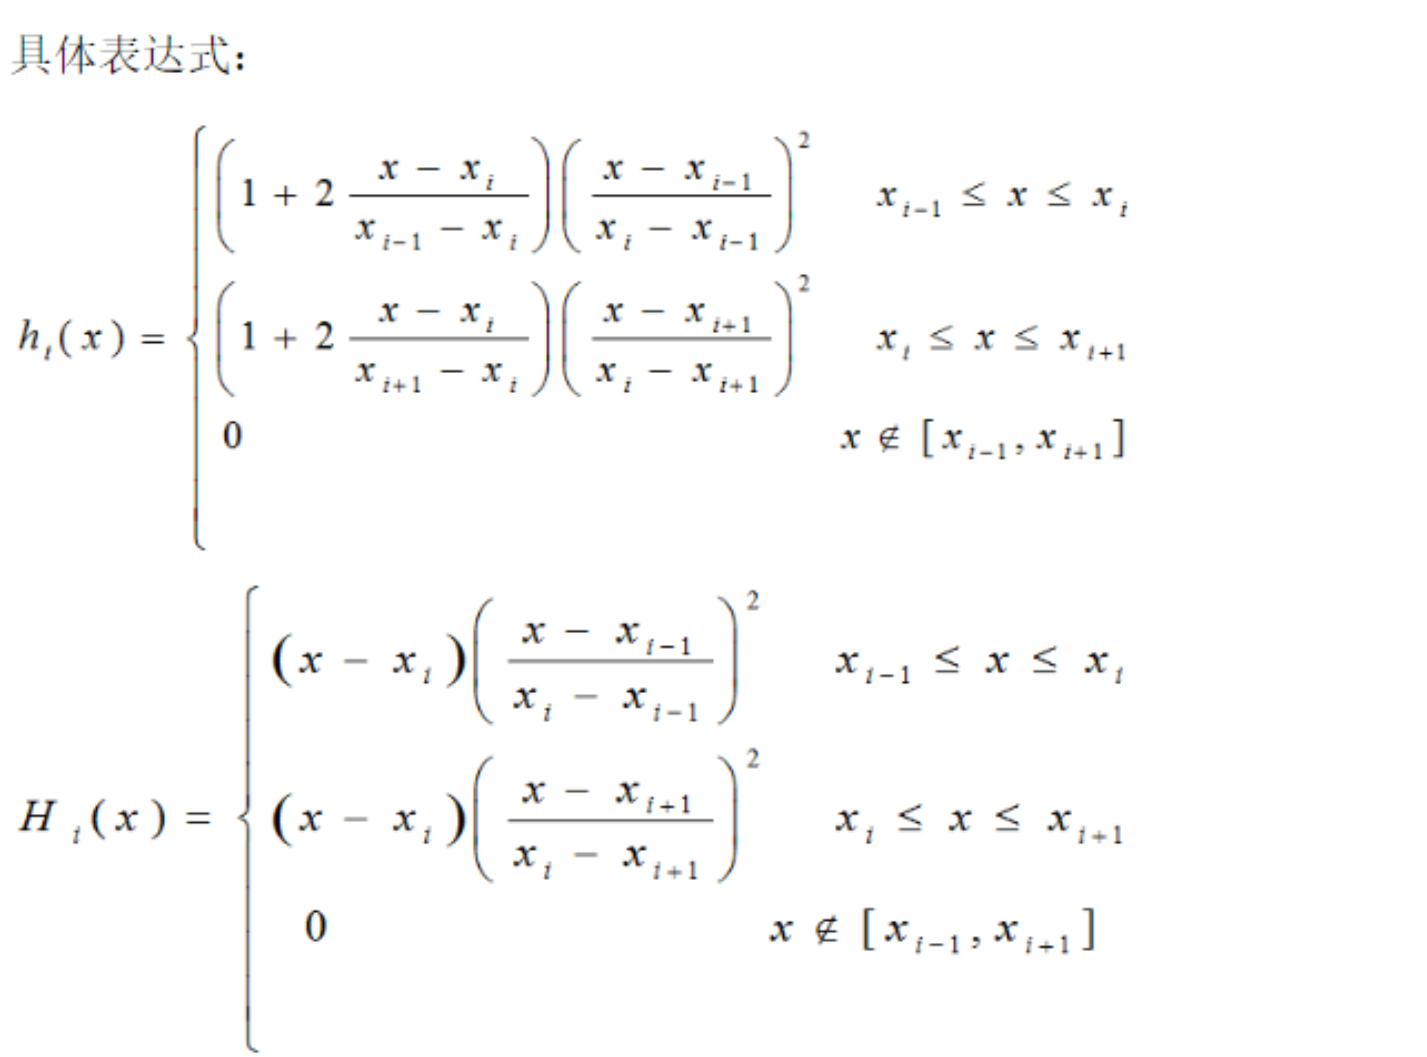

### 适用场景
导数值也要求对应起来，甚至要求高阶导数值也相等。

保证曲线光滑，使插值函数和被插值函数的密和程度更好

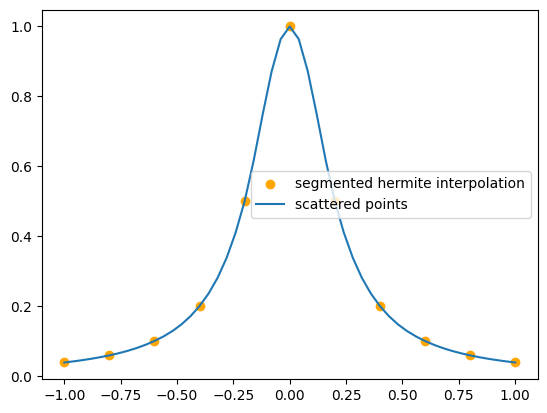

In [5]:
# Hermite Interpolation
import numpy as np
import matplotlib.pyplot as plt
from sympy import *


def hermite(x0, x1, y0, y1, y0_prime, y1_prime, x):
    def alpha0(x): return ((x-x1)/(x0-x1))**2 * (2*(x-x0)/(x1-x0)+1)
    def alpha1(x): return ((x-x0)/(x1-x0))**2 * (2*(x-x1)/(x0-x1)+1)
    def beta0(x): return ((x-x1)/(x0-x1))**2 * (x-x0)
    def beta1(x): return ((x-x0)/(x1-x0))**2 * (x-x1)
    H = alpha0(x)*y0 + alpha1(x)*y1 + beta0(x)*y0_prime + beta1(x)*y1_prime
    return H


def segmented_hermite(xlist, ylist, dflist, x):
    xlist = sorted(xlist)
    data = dict(zip(xlist, ylist))
    # Sort by key, (which is xlist)
    data = sorted(data.items(), key=lambda item: item[0])
    data = dict(data)
    xlist = list(data.keys())
    ylist = list(data.values())
    n = len(xlist)-1
    if n == 0:
        raise ValueError("n should be greater or equal to 1")
    # print("segmented Hermite interpolate, n =",n)
    # Judge which interval the new element should be
    i = -1
    for t in xlist:
        if x >= t:
            i += 1
    if i == -1 or i > len(xlist)-1:
        raise ValueError("x should be between %f and %f" %
                         (xlist[0], xlist[-1]))
    if i == len(xlist)-1:
        return ylist[i]
    return hermite(xlist[i], xlist[i+1], ylist[i], ylist[i+1], dflist[i], dflist[i+1], x)


# DATA
# Define in sympy type, f: original function; df: derivative of the function
x = symbols('x')F
f = 1/(1+25*x**2)
df = diff(f, x)
def dfx(x): return eval(str(df))
def fx(x): return eval(str(f))
x_points = np.linspace(-1, 1, 11)
y_points = list(map(fx, x_points))
df_points = list(map(dfx, x_points))


def f(x): return segmented_hermite(x_points, y_points, df_points, x)
x = np.linspace(-1, 1, 71)
y = list(map(f, x))

plt.figure("segmented hermite interpolation")
plt.scatter(x_points, y_points, color="orange")
plt.plot(x, y)
plt.legend(["segmented hermite interpolation", "scattered points"])
plt.show()
